In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [228]:
df_raw = pd.read_csv('C:\\Users\\en89912\\Downloads\\machine_measurements.csv')

In [229]:
display(df_raw)

,EnginePowerPercentage_prcnt,FuelTemperature_C,EngineCoolantTemperature_C,ActualEnginePercentTorque_prcnt,DieselExaustFluidLevelPercentage_prcnt,FuelLevelPercentage_prcnt,TransmissionOilTemperature_C,EngineSpeed_RPM,EngineOilPressure_bar
0,9.0,31.0,35.0,8.0,NaN,100.0,30.0,896.50,2.40
1,9.0,31.0,35.0,8.0,NaN,100.0,30.0,894.50,2.40
2,9.0,31.0,35.0,8.0,NaN,100.0,30.0,906.50,2.44
3,9.0,31.0,35.0,8.0,NaN,100.0,30.0,895.25,2.44
4,9.0,31.0,36.0,8.0,NaN,100.0,30.0,900.50,2.44
...,...,...,...,...,...,...,...,...,...
999995,26.0,215.0,95.0,21.0,83.2,101.6,73.0,1147.50,2.48
999996,26.0,215.0,95.0,22.0,83.2,101.6,73.0,1143.00,2.44
999997,26.0,215.0,95.0,22.0,83.2,101.6,73.0,1144.25,2.44
999998,26.0,215.0,95.0,21.0,83.2,101.6,73.0,1147.00,2.44


In [230]:
features = ['EnginePowerPercentage_prcnt', 'FuelTemperature_C', 'EngineCoolantTemperature_C', 'ActualEnginePercentTorque_prcnt',
            'DieselExaustFluidLevelPercentage_prcnt', 'FuelLevelPercentage_prcnt', 'TransmissionOilTemperature_C', 'EngineSpeed_RPM', 'EngineOilPressure_bar']

In [231]:
df = df_raw[features]

In [232]:
df = df.fillna(0)

In [233]:
print(df.shape)

(1000000, 9)


In [271]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df)

In [272]:
print(components.shape)

(1000000, 2)


In [273]:
df_pca = pd.DataFrame(components, columns=['x','y'])

<AxesSubplot:xlabel='x', ylabel='y'>

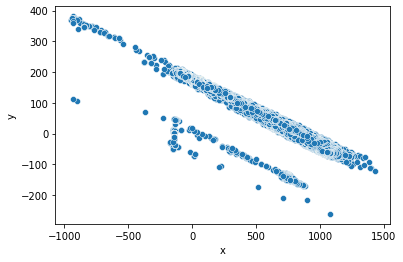

In [274]:
import seaborn as sns

sns.scatterplot(data=df_pca, x="x", y="y")

In [288]:
latent_dim = 5

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(9, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [289]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [290]:
train_df, test_df, _, _ = train_test_split(
    df, df, test_size=0.2, random_state=21
)

In [291]:
min_val = tf.reduce_min(train_df).numpy()
max_val = tf.reduce_max(train_df).numpy()

train_data = (train_df - min_val) / (max_val - min_val)
test_data = (test_df - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [292]:
print(train_data)

tf.Tensor(
[[2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 ...
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [1.6659047e-02 8.7358423e-02 3.8600232e-02 ... 2.7629642e-02
  8.0202144e-01 1.1539438e-03]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]], shape=(800000, 9), dtype=float32)


In [293]:
print(test_data)

tf.Tensor(
[[2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [1.7065367e-02 8.7358423e-02 3.2099143e-02 ... 2.7223323e-02
  7.0384479e-01 1.1539438e-03]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 ...
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]
 [2.8848596e-02 8.5326834e-03 1.0564274e-02 ... 2.4582254e-02
  3.6568642e-01 1.3002184e-04]], shape=(200000, 9), dtype=float32)


In [294]:
history = autoencoder.fit(train_data, train_data,
                epochs=10,
                shuffle=True,
                validation_data=(test_data, test_data))

Epoch 1/10
25000/25000 [==============================] - 21s 845us/step - loss: 0.0024 - val_loss: 8.2683e-06
Epoch 2/10
25000/25000 [==============================] - 21s 836us/step - loss: 7.2261e-06 - val_loss: 6.7358e-06
Epoch 3/10
25000/25000 [==============================] - 21s 856us/step - loss: 6.3912e-06 - val_loss: 6.3656e-06
Epoch 4/10
25000/25000 [==============================] - 22s 870us/step - loss: 6.0449e-06 - val_loss: 6.0827e-06
Epoch 5/10
25000/25000 [==============================] - 21s 837us/step - loss: 5.8538e-06 - val_loss: 5.7363e-06
Epoch 6/10
25000/25000 [==============================] - 22s 868us/step - loss: 5.7474e-06 - val_loss: 5.7671e-06
Epoch 7/10
25000/25000 [==============================] - 23s 905us/step - loss: 5.6845e-06 - val_loss: 5.5841e-06
Epoch 8/10
25000/25000 [==============================] - 21s 831us/step - loss: 5.6472e-06 - val_loss: 5.5552e-06
Epoch 9/10
25000/25000 [==============================] - 22s 873us/step - loss: 5.6

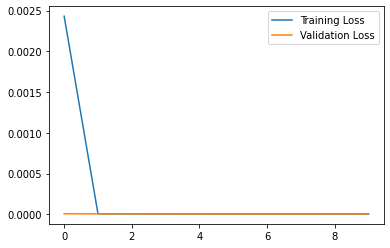

In [282]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [283]:
print(train_loss)

tf.Tensor([0.00012907 0.00380314 0.00012907 ... 0.00012907 0.00012907 0.00012907], shape=(200000,), dtype=float32)


6250/6250 [==============================] - 4s 577us/step


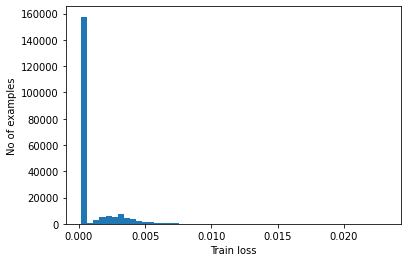

In [284]:
reconstructions = autoencoder.predict(test_data)
train_loss = tf.keras.losses.mae(reconstructions, test_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [285]:
a = train_loss > 0.015
print(np.sum(a))
print(train_loss.numpy().shape)
print(train_loss.numpy())

10
(200000,)
[0.00018117 0.00355553 0.00018117 ... 0.00018117 0.00018117 0.00018117]


In [286]:
index = np.where(train_loss.numpy() > 0.015)

In [287]:
pd.set_option('display.max_rows', 500)

display(test_df.iloc[index])

,EnginePowerPercentage_prcnt,FuelTemperature_C,EngineCoolantTemperature_C,ActualEnginePercentTorque_prcnt,DieselExaustFluidLevelPercentage_prcnt,FuelLevelPercentage_prcnt,TransmissionOilTemperature_C,EngineSpeed_RPM,EngineOilPressure_bar
830939,100.0,215.0,78.0,44.0,77.6,0.0,45.0,762.625,0.00
898600,1.0,215.0,100.0,94.0,91.6,101.6,71.0,2276.625,2.64
384354,0.0,0.0,0.0,42.0,0.0,0.0,0.0,900.000,0.00
931100,19.0,215.0,85.0,81.0,77.2,32.0,59.0,2114.750,3.08
792981,71.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000,0.00
928782,19.0,215.0,85.0,81.0,77.2,32.0,59.0,2114.750,3.08
179934,0.0,0.0,0.0,42.0,0.0,74.8,0.0,900.000,0.32
797582,71.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000,0.32
925775,19.0,215.0,85.0,81.0,77.2,32.0,59.0,2114.750,3.08
906270,2.0,215.0,96.0,72.0,94.4,101.6,61.0,1386.000,2.48
